# Research

In [23]:
import pandas as pd
from datetime import datetime, timedelta, date
import time
import matplotlib.pyplot as plt

In [24]:
df_quotes = pd.read_csv("ft_quotes.csv",index_col=0,parse_dates=True).sort_index(ascending=True).ffill().dropna(axis=1)
df_quotes.index = [x.date() for x in df_quotes.index]
df_perform = pd.read_csv("ft_funds_perform.csv", index_col=0)
df_cat_perform = pd.read_csv("ft_cat_perform.csv", index_col=0)
df_trading_signal = pd.read_csv("ft_trading_signals.csv", index_col=0)
df_trading_signal.index.name = 'Code'

max_date = df_quotes.index.max()
w1_ago = max_date-timedelta(days=7)
w1_ago = df_quotes[df_quotes.index <= w1_ago].index.max()
d1_ago = max_date-timedelta(days=1)
d1_ago = df_quotes[df_quotes.index <=d1_ago].index.max()
w2_ago = max_date-timedelta(days=14)
w2_ago = df_quotes[df_quotes.index <= w2_ago].index.max()

df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[d1_ago]-1).rename('1 day'))
df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[w1_ago]-1).rename('1 week'))
df_perform = df_perform.join((df_quotes.loc[max_date]/df_quotes.loc[w2_ago]-1).rename('2 week'))

df_perform = df_perform[df_perform['currency'].isin(['EUR','USD'])]

df_perform = df_perform[~df_perform.index.str.startswith("PT")]

### Short term

In [25]:
df_perform.sort_values(by="1 week", ascending=False).dropna()

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU1897414303,0.1887,0.1124,0.2065,0.2859,0.0711,0.0484,Sector Equity Biotechnology,Janus Henderson Horizon Biotechnology A2 USD Acc,USD,5,6,0.0,0.069626,0.096832
LU0112497440,0.0582,-0.0013,0.1073,0.2337,0.0189,0.0247,Sector Equity Biotechnology,Pictet-Biotech R USD,USD,2,7,0.0,0.063856,0.091451
LU0190162189,0.0260,-0.0621,0.0538,0.2232,0.0100,0.0175,Other Equity,Pictet-Biotech HR EUR,EUR,0,7,0.0,0.063484,0.090595
LU0255977539,0.0577,-0.0020,0.1043,0.2310,0.0181,0.0227,Sector Equity Biotechnology,Pictet-Biotech R EUR,EUR,2,7,0.0,0.056097,0.076863
LU0069152568,0.0440,-0.0122,-0.0128,0.0885,-0.0135,-0.0103,Sector Equity Biotechnology,UBS (Lux) Equity Fund - Biotech (USD) P-acc,USD,3,7,0.0,0.053969,0.064108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LU1989765638,0.0612,-0.0507,-0.1158,0.1363,0.1631,0.0316,Other Equity,CPR Invest - Global Gold Mines A EURH Acc,EUR,0,7,0.0,-0.038353,0.021149
LU0496369389,0.1093,-0.0431,-0.0409,0.1700,0.1812,0.0094,Sector Equity Precious Metals,Franklin Gold & Precious Metals Fund N(acc)EUR,EUR,3,7,0.0,-0.040222,0.002899
LU1989765471,0.1009,0.0171,-0.0678,0.1420,0.1814,0.0408,Sector Equity Precious Metals,CPR Invest - Global Gold Mines A EUR Acc,EUR,3,7,0.0,-0.043141,0.009841
LU0345780521,0.1125,0.0266,-0.0420,0.1482,0.1862,0.0279,Sector Equity Precious Metals,Ninety One Global Strategy Fund - Global Gold ...,USD,4,7,0.0,-0.046019,-0.001272


In [26]:

df_perform[df_perform['rating']>=3].sort_values(by="1 week", ascending=False).dropna().head(10)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
LU1897414303,0.1887,0.1124,0.2065,0.2859,0.0711,0.0484,Sector Equity Biotechnology,Janus Henderson Horizon Biotechnology A2 USD Acc,USD,5,6,0.000000,0.069626,0.096832
LU0069152568,0.0440,-0.0122,-0.0128,0.0885,-0.0135,-0.0103,Sector Equity Biotechnology,UBS (Lux) Equity Fund - Biotech (USD) P-acc,USD,3,7,0.000000,0.053969,0.064108
LU0244354824,-0.0268,-0.1475,-0.1103,-0.0256,0.2292,0.0946,China Equity,Schroder International Selection Fund China Op...,USD,4,6,0.000000,0.046548,0.112929
LU0594300096,-0.0623,-0.1763,-0.0816,-0.0275,0.1982,0.1092,China Equity,Fidelity Funds - China Consumer Fund A-Acc-EUR,EUR,3,6,0.000000,0.044135,0.120948
LU0982190216,-0.0193,-0.1379,-0.0169,0.0445,0.2006,0.0851,China Equity,GAM Multistock - China Evolution Equity USD E,USD,3,6,0.012432,0.044039,0.114255
IE00BYX5N334,0.0760,0.0655,0.1990,0.1382,0.0603,-0.0081,Japan Large-Cap Equity,Fidelity MSCI Japan Index Fund USD P Acc,USD,3,6,0.000000,0.042994,0.041335
LU0164857640,-0.0502,-0.1144,-0.0593,0.0424,0.1542,0.0874,Hong Kong Equity,HSBC Global Investment Funds - Hong Kong Equit...,USD,3,6,0.000000,0.042547,0.098085
IE0007292083,0.0769,0.0670,0.1968,0.1516,0.0633,0.0045,Japan Large-Cap Equity,Vanguard Japan Stock Index Fund Investor USD A...,USD,3,6,0.000000,0.042526,0.040192
LU0117867159,-0.0219,-0.1981,-0.1197,0.0212,0.2335,0.1163,China Equity,JPMorgan Funds - China Fund D (acc) - USD,USD,3,7,0.000000,0.041781,0.124564
LU0348735423,-0.0464,-0.1157,-0.0810,0.0074,0.1924,0.1019,Hong Kong Equity,Allianz Global Investors Fund - Allianz Hong K...,USD,3,6,0.000000,0.038421,0.109150


In [27]:
df_perform[(df_perform['risk']<=3) & (df_perform['currency']=="EUR")].sort_values(by="2 week", ascending=False).dropna().head(10)

,5 years,3 years,1 year,6 months,3 months,1 month,ft category,name,currency,rating,risk,1 day,1 week,2 week
IE00B11XZB05,-0.0237,-0.0645,-0.0440,0.0265,-0.0074,-0.0053,Other Bond,PIMCO GIS Total Return Bond Fund E Class EUR (...,EUR,0,3,0.0,0.009598,0.012026
IE0009516141,-0.0255,-0.0686,-0.0653,0.0167,-0.0167,-0.0074,Other Bond,Janus Henderson Capital Funds plc - Flexible I...,EUR,0,3,0.0,0.009804,0.011457
LU0577845802,-0.0183,-0.0196,-0.0176,-0.0029,0.0041,0.0011,Other Bond,NN (L) Emerging Markets Debt (Local Currency) ...,EUR,0,3,0.0,0.006088,0.009867
LU0546067538,-0.0125,-0.0444,-0.0237,0.0223,-0.0010,-0.0016,Other Bond,AXA IM Fixed Income Investment Strategies - US...,EUR,0,3,0.0,0.007072,0.009452
LU1548496022,0.0134,-0.0090,0.0471,0.0556,0.0084,-0.0055,EUR Cautious Allocation - Global,Allianz Global Investors Fund - Allianz Dynami...,EUR,4,3,0.0,0.002007,0.009374
LU1089088071,0.0134,-0.0091,0.0471,0.0556,0.0084,-0.0056,EUR Cautious Allocation - Global,Allianz Global Investors Fund - Allianz Dynami...,EUR,4,3,0.0,0.001908,0.009338
LU0549623634,-0.0217,-0.0593,-0.0575,0.0169,-0.0178,-0.0046,Other Bond,JPMorgan Funds - US Aggregate Bond Fund D (acc...,EUR,0,3,0.0,0.008333,0.008333
LU0858317984,-0.0354,-0.0647,-0.0621,0.0233,-0.0170,-0.0053,Other Bond,Nordea 1 - US Total Return Bond Fund HE EUR,EUR,0,3,0.0,0.007125,0.008082
IE00B5B2BY02,-0.0263,-0.0669,-0.1031,-0.0578,-0.0276,-0.0121,Macro Trading EUR,GAM Star Fund plc - GAM Star Emerging Market R...,EUR,2,3,0.0,0.005556,0.007795
LU0419187058,-0.0067,-0.0337,-0.0088,0.0130,-0.0100,-0.0110,Global Flexible Bond - EUR Hedged,RAM (Lux) Tactical Funds - Global Bond Total R...,EUR,3,3,0.0,0.006387,0.007613


### Category 

In [28]:
#df_cat_perform.drop(columns=["3 years","6 months"],inplace=True)
df_perform_group_by = df_perform.groupby(by="ft category")
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 day'].mean().rename('1 day mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].median().rename('1 m mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 day'].median().rename('1 day median'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].max().rename('1 m max'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 month'].count().rename('count'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 week'].median().rename('1 w mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['1 week'].max().rename('1 w max'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['2 week'].median().rename('2 w mean'))
df_cat_perform = df_cat_perform.join(df_perform_group_by['2 week'].max().rename('2 w max'))

In [29]:
df_cat_perform['1 w mean'].sort_values(ascending=False)[:20]

ft category
Sector Equity Biotechnology       0.055033
Hong Kong Equity                  0.040484
Japan Flex-Cap Equity             0.034911
Property - Indirect Eurozone      0.030443
Japan Large-Cap Equity            0.024899
Greater China Equity              0.024590
Property - Indirect Europe        0.024541
China Equity                      0.021694
JPY Bond                          0.020935
Turkey Equity                     0.019833
Brazil Equity                     0.019333
Thailand Equity                   0.018752
Property - Indirect Other         0.016407
Asia-Pacific Equity               0.015158
Asia ex-Japan Equity              0.014112
Other Allocation                  0.012920
Property - Indirect Global        0.012550
Nordic Small/Mid-Cap Equity       0.012146
Greater China Allocation          0.012103
Global Emerging Markets Equity    0.011418
Name: 1 w mean, dtype: float64

In [30]:
df_cat_perform[~df_cat_perform['1 day mean'].isna()].sort_values(by="1 w mean",ascending=False)

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
Sector Equity Biotechnology,0.0641,-0.0584,0.0111,0.1396,0.0161,-0.0298,0.0,0.01200,0.0,0.0484,8.0,0.055033,0.069626,0.070486,0.096832
Hong Kong Equity,-0.0425,-0.0874,-0.0881,0.0143,0.1632,0.0705,0.0,0.09465,0.0,0.1019,2.0,0.040484,0.042547,0.103617,0.109150
Japan Flex-Cap Equity,0.0385,0.0101,0.0973,0.0823,0.0148,-0.0165,0.0,-0.01145,0.0,-0.0081,2.0,0.034911,0.037090,0.023996,0.028350
Property - Indirect Eurozone,-0.0706,-0.0844,-0.0234,0.0133,0.0891,0.0890,0.0,0.05390,0.0,0.0539,2.0,0.030443,0.030447,0.048935,0.055770
Japan Large-Cap Equity,0.0656,0.0436,0.1573,0.1178,0.0410,-0.0162,0.0,-0.01120,0.0,0.0045,28.0,0.024899,0.042994,0.021375,0.041335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sector Equity Natural Resources,0.1025,0.0763,0.0884,0.1138,0.1152,0.0170,0.0,0.00240,0.0,0.0447,12.0,-0.022337,0.021880,0.005062,0.033689
Sector Equity Energy,0.0857,0.2356,0.1713,0.0516,0.1060,-0.0118,0.0,-0.01830,0.0,0.0046,8.0,-0.023691,-0.006524,-0.006905,-0.002227
Systematic Trend USD,0.0703,0.1035,0.0886,0.0174,0.0660,0.0053,0.0,-0.01800,0.0,-0.0180,1.0,-0.033254,-0.033254,-0.011591,-0.011591


In [31]:
df_cat_perform[~df_cat_perform['1 day mean'].isna()].sort_values(by="2 w mean",ascending=False)

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
Hong Kong Equity,-0.0425,-0.0874,-0.0881,0.0143,0.1632,0.0705,0.000000,0.09465,0.0,0.1019,2.0,0.040484,0.042547,0.103617,0.109150
Greater China Equity,0.0007,-0.1210,0.0026,0.0663,0.1493,0.0320,0.000000,0.06270,0.0,0.0971,9.0,0.024590,0.049997,0.089692,0.136812
China Equity,-0.0440,-0.1513,-0.0820,0.0173,0.1913,0.0616,0.000389,0.07910,0.0,0.1163,32.0,0.021694,0.046548,0.078445,0.124564
Turkey Equity,0.2130,0.3972,0.5417,0.2739,0.1740,0.1476,0.000000,0.16545,0.0,0.1714,2.0,0.019833,0.021920,0.072428,0.078907
Sector Equity Biotechnology,0.0641,-0.0584,0.0111,0.1396,0.0161,-0.0298,0.000000,0.01200,0.0,0.0484,8.0,0.055033,0.069626,0.070486,0.096832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sector Equity Energy,0.0857,0.2356,0.1713,0.0516,0.1060,-0.0118,0.000000,-0.01830,0.0,0.0046,8.0,-0.023691,-0.006524,-0.006905,-0.002227
Options Trading,-0.0858,-0.0938,-0.1175,-0.0335,-0.0633,0.0054,0.000000,0.00985,0.0,0.0133,4.0,0.006446,0.010018,-0.007669,0.019698
Commodities - Broad Basket,0.0616,0.0541,0.0251,0.0025,0.0695,0.0075,0.000000,0.00340,0.0,0.0119,5.0,-0.019441,-0.015881,-0.011029,-0.008145


In [32]:
trendy_cat = df_cat_perform.apply(lambda x: x['1 w mean'] + x['1 m mean']*(1 if (x['1 w mean']<0 and x['1 m mean']<0) else -1)  ,axis=1).sort_values(ascending=False)[:10]
trendy_cat = df_cat_perform[df_cat_perform.apply(lambda x: (x['1 w mean'] > 0) and (x['1 m mean'] <0)  ,axis=1)][:20].sort_values(by=['2 w mean'],ascending=False)
trendy_cat

,5 years,3 years,1 year,6 months,3 months,1 month,1 day mean,1 m mean,1 day median,1 m max,count,1 w mean,1 w max,2 w mean,2 w max
ft category,,,,,,,,,,,,,,,
Brazil Equity,-0.0104,0.0278,0.1600,0.0391,-0.0356,-0.0274,0.000000,-0.04090,0.000000,-0.0036,5.0,0.019333,0.025994,0.039696,0.044066
Australia & New Zealand Equity,0.0855,0.0361,0.0507,0.1099,0.0295,-0.0215,0.009001,-0.00180,0.009001,-0.0018,1.0,0.011138,0.011138,0.029965,0.029965
Europe Mid-Cap Equity,0.0417,-0.0324,0.0252,0.1297,0.0283,-0.0097,0.000000,-0.00760,0.000000,0.0160,11.0,0.004268,0.021021,0.018008,0.035528
EUR Moderate Allocation - Global,0.0250,-0.0027,0.0519,0.0742,0.0185,-0.0150,0.000167,-0.00660,0.000000,0.0065,62.0,0.001676,0.011811,0.012512,0.026973
"Convertible Bond - Global, USD Hedged",0.0301,-0.0060,0.0553,0.0471,0.0227,-0.0100,0.000000,-0.00245,0.000000,0.0013,8.0,0.000371,0.003137,0.009937,0.013849
"Convertible Bond - Global, EUR Hedged",0.0033,-0.0640,0.0045,0.0433,0.0036,-0.0198,0.000000,-0.01140,0.000000,-0.0055,15.0,0.000463,0.007661,0.009340,0.018279
EUR Flexible Allocation - Global,0.0276,0.0039,0.0536,0.0778,0.0248,-0.0156,0.000000,-0.00490,0.000000,0.0070,39.0,0.001029,0.007562,0.008929,0.017975
Equity Market Neutral EUR,0.0385,0.0386,0.0724,0.0438,0.0304,0.0024,0.000000,-0.00450,0.000000,0.0152,13.0,0.000449,0.012804,0.006326,0.017145
EUR Subordinated Bond,0.0156,-0.0120,0.0810,0.0639,0.0159,-0.0033,0.000000,-0.00120,0.000000,0.0023,6.0,0.002750,0.004499,0.006206,0.006278


In [33]:

relevant_funds = set(df_perform[df_perform['currency'].isin(["EUR","USD"])].index)
relevant_funds &= set([idx for idx in df_perform.index if not idx.startswith("PT")])
relevant_funds &= set(df_quotes.columns)
len(relevant_funds)

2936

In [34]:

trendy_funds = set(df_trading_signal[df_trading_signal['Trading Signal']>1].index)
#trendy_funds &= set(df_perform[df_perform['rating'] >= 3].index)
cats_to_ignore = []#['Sector Equity Precious Metals','Sector Equity Natural Resources']
#cats_to_ignore += ['Asia-Pacific ex-Japan Equity','Sector Equity Ecology','US Large-Cap Growth Equity']
trendy_funds |= set(df_perform[df_perform.groupby('ft category')['2 week'].transform('max')==df_perform['2 week']].index)
trendy_funds |= set(df_perform[df_perform['rating'] >= 5].index)
trendy_funds &= set(df_perform[~df_perform['ft category'].isin(cats_to_ignore)].index)
trendy_funds &= set(df_perform[df_perform['currency'].isin(["EUR","USD"])].index)
print(len(trendy_funds))
df_perform[df_perform.index.isin(trendy_funds)].groupby('ft category')['1 week'].count().sort_values(ascending=False)[:20]

996


ft category
Global Emerging Markets Equity                   61
Other Equity                                     58
Other Bond                                       45
Global Flexible Bond - EUR Hedged                40
Global Emerging Markets Bond - Local Currency    27
Europe Large-Cap Blend Equity                    26
USD Moderate Allocation                          23
Japan Large-Cap Equity                           21
USD High Yield Bond                              21
EUR Moderate Allocation - Global                 20
Global Large-Cap Growth Equity                   20
Global Emerging Markets Bond                     20
Global Large-Cap Blend Equity                    19
EUR Flexible Allocation - Global                 17
Global High Yield Bond - EUR Hedged              17
Global High Yield Bond                           16
Asia ex-Japan Equity                             15
Sector Equity Ecology                            15
Global Flexible Bond - USD Hedged                13


[]

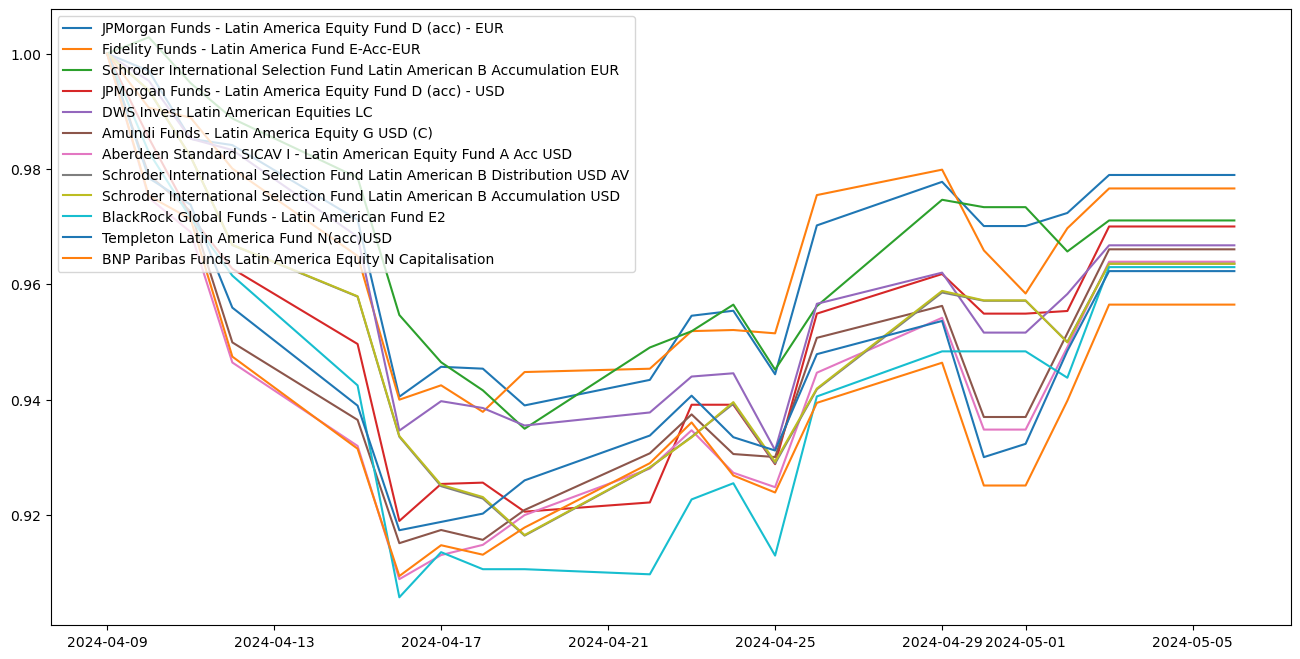

In [35]:
cats = ['Latin America Equity']
filter = df_perform['ft category'].isin(cats) & df_perform.index.isin(df_quotes.columns) & df_perform.index.isin(trendy_funds)
#filter &= df_perform.index.isin(df_trading_signal[df_trading_signal['Trading Signal']>1].index)
df = df_quotes[df_perform[filter].index][-20:]
ax = df.apply(lambda x: x/df.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df.index.max(), axis='columns', ascending=False).plot(figsize=(16,8))
ax.legend(loc='upper left')
ax.plot()

In [36]:
df_trading_signal

,Trading Signal,Extreme Signal
Code,,
DE000A2DR2L2,1,0.1
DE000A0X7541,1,0.1
DE000A1T73W9,2,0.0
LU1064047639,2,-0.3
LU1997245177,1,-0.1
...,...,...
LU0338483158,0,1.0
LU0338482770,0,1.0
LU0090830497,0,1.0


In [37]:
df_perform.loc['IE00BLP5S353']['name']

'Jupiter Merian Global Equity Absolute Return Fund L USD Acc'

In [38]:
df_quotes.index

Index([2022-11-14, 2022-11-15, 2022-11-16, 2022-11-17, 2022-11-18, 2022-11-21,
       2022-11-22, 2022-11-23, 2022-11-24, 2022-11-25,
       ...
       2024-04-23, 2024-04-24, 2024-04-25, 2024-04-26, 2024-04-29, 2024-04-30,
       2024-05-01, 2024-05-02, 2024-05-03, 2024-05-06],
      dtype='object', length=282)

In [39]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
import cvxpy
import numpy as np
cvxpy.installed_solvers()

['CLARABEL', 'ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']

### Parameters

In [40]:
risk_free_rate = 0.03
last_n = 20
cov_n = 130

amount_to_buy = 75000
amount_to_sell = 75000

### Portofolio Studies

In [41]:


#Remove funds that were sold
ignore_funds = set()
#sold_funds = {'LU0115098948','LU0055114457','LU0300742037'}

#####  Get the current Portofolio
portfolio_csv = 'portofolio.csv'
df_portofolio = pd.read_csv(portfolio_csv ,sep=';').set_index('Code').drop('LU0122613903')

#Select only funds that are in the portfolio and have quotes
df_portofolio = df_portofolio[df_portofolio.index.isin((set(df_portofolio.index) & set(df_quotes.columns)) - ignore_funds)]


#Add the last price to the portolio 
df_portofolio['Last Price'] = df_quotes[df_portofolio.index].iloc[-1]

#get the last USD change rate
exchange_rates_csv = 'exchange_rates.csv'
exchange_rates = pd.read_csv(exchange_rates_csv ,sep=';',parse_dates=[0])
exchange_rates['Date'] = exchange_rates['Date'].apply(lambda x: x.date())
usd2eur = exchange_rates.set_index('Date').iloc[0].iloc[0]

#Add the amount in EUR to the portolio
df_portofolio['Amount EUR'] = df_portofolio['Moeda'].apply(lambda x: usd2eur if x == 'USD' else 1) * df_portofolio['Last Price'] * df_portofolio['Quantidade']

df_portofolio_x = df_portofolio.join(df_trading_signal)
df_portofolio_x['Total Signal'] = df_portofolio_x['Trading Signal'] + df_portofolio_x['Extreme Signal']
df_portofolio_x.sort_values('Total Signal')

current_portfolio_amount = df_portofolio['Amount EUR'].sum()

final_portfolio_amount = current_portfolio_amount + amount_to_buy - amount_to_sell
current_portfolio_amount,final_portfolio_amount

(308613.05498605355, 308613.05498605355)

In [42]:
df_portofolio.sort_values(by='Nome')

,Nome,Moeda,Quantidade,Last Price,Amount EUR
Code,,,,,
LU1124235240,Aberdeen Diversified Income,EUR,903.760,9.48,8567.644800
LU0319687124,Amundi Volatility World,USD,114.554,104.50,11122.755231
LU0823433858,BNP Paribas Funds Turkey,EUR,33.783,279.89,9455.523870
IE00B432GG85,BNY Mell Glb Dyn Bond A,EUR,3609.770,1.35,4873.189500
LU1508158513,BlackRock Asia Pacific,EUR,171.550,140.12,24037.586000
LU2207571022,FF Absolute Return Global Hedged,EUR,1886.040,10.02,18898.120800
LU0788144201,Fidelity China RMB Bond,EUR,1639.470,13.33,21854.135100
LU1038809395,Flossbach Multiple Opportunit,EUR,47.684,170.09,8110.571560
LU0122614463,Franklin Dollar Short Term Money,USD,1653.260,10.98,16866.669288


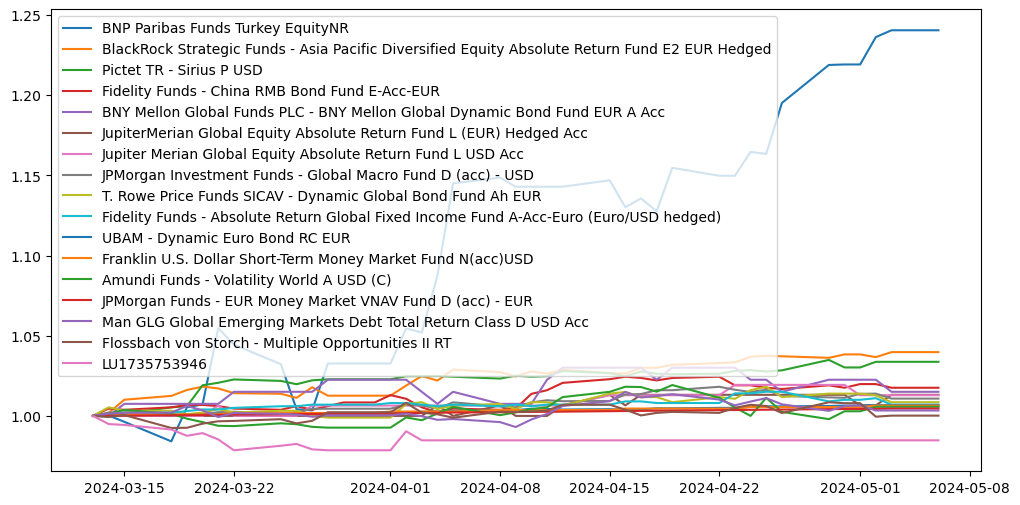

In [43]:
if len(df_portofolio_x[df_portofolio_x['Total Signal']<0].index):
    df_plot = df_quotes[df_portofolio_x[df_portofolio_x['Total Signal']<0].index][-40:]
    ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
    ax.legend(loc='upper left')
    ax.plot()

### Portfolio Optimization Functions

In [44]:
def valid_date(d: date) -> date:
    if d in df_quotes.index:
        return d
    return max(dd for dd in df_quotes.index if dd <= d)
    
def new_fund_performance(new_portfolio, new_fund, amount=5000.0, risk_free_rate=risk_free_rate, last_n=last_n, goal='max_sharpe',target=None,weight_bounds = (0,1)):
    if new_fund in new_portfolio.index:
        new_portfolio.loc[new_fund,'Amount EUR'] += amount
    else:
        new_portfolio.loc[new_fund] = ["", df_perform.loc[new_fund]['currency'],1,amount,amount]

    mu = mean_historical_return(df_quotes[new_portfolio.index][-last_n:])
    S = CovarianceShrinkage(df_quotes[new_portfolio.index][-cov_n:]).ledoit_wolf()
    ef = EfficientFrontier(mu, S, weight_bounds=weight_bounds, solver='SCS')
    if goal=='max_sharpe':
        ef.max_sharpe(risk_free_rate=risk_free_rate)
    elif goal=='min_volatility':
        ef.min_volatility()
    elif goal=='efficient_risk':
        ef.efficient_risk(target_volatility=target)
    elif goal=='efficient_return':
        ef.efficient_return(target_return=target)
    else:
        raise ValueError('Invalid Goal!')
    return new_portfolio, ef.portfolio_performance(risk_free_rate=risk_free_rate)

def new_funds_to_add(df_portofolio, selected_funds, n_funds_to_add, last_n, goal, target=None, verbose=False, weight_bounds = (0,1)):

    mu = mean_historical_return(df_quotes[df_portofolio.index][-last_n:])
    S = CovarianceShrinkage(df_quotes[df_portofolio.index][-cov_n:]).ledoit_wolf()

    ef = EfficientFrontier(mu, S, solver='SCS')
    weights = df_portofolio["Amount EUR"] / df_portofolio["Amount EUR"].sum()
    ef.set_weights(weights)

    current_return, current_volatility, current_sharpe_ratio = ef.portfolio_performance(risk_free_rate=risk_free_rate)

    max_sharpe = current_sharpe_ratio
    min_volatility = current_volatility
    amount = 10000.0
    funds_to_buy = []
    performance = None

    current_portfolio = df_portofolio.copy()
    for i in range(n_funds_to_add):
        best_fund = None
        for new_fund in selected_funds:
            try:
                _, (new_return,new_volatility,new_sharpe) = new_fund_performance(
                                                    new_portfolio=current_portfolio.copy(),
                                                    new_fund=new_fund,
                                                    last_n=last_n,
                                                    goal=goal,
                                                    target=target)
                if ((goal == 'max_sharpe') or (goal == 'efficient_risk')) and (new_sharpe > max_sharpe):
                    max_sharpe = new_sharpe
                    best_fund = new_fund
                if ((goal == 'min_volatility') or (goal == 'efficient_return')) and (new_volatility < min_volatility):
                    min_volatility = new_volatility
                    best_fund = new_fund
            except Exception as e:
                raise e
                pass
        
        if best_fund is None:
            print("\nNo more Funds found!")
            break
        else:
            funds_to_buy.append(best_fund)
            current_portfolio, performance = new_fund_performance(
                new_portfolio=current_portfolio,
                new_fund=best_fund,
                last_n=last_n,
                goal=goal,
                target=target)
            if verbose:
                print("### Performance with ", best_fund)
                print(df_perform.loc[best_fund][['ft category','name']])
                print(performance)
    return funds_to_buy, performance

def portfolio_strategy(dfi, ef, prev_strategy=None):
    cleaned_weights = ef.clean_weights()
    cleaned_weights = [(s,w) for s,w in cleaned_weights.items()]
    dfo = pd.DataFrame(cleaned_weights,columns=['Code','w']).sort_values(by='w',ascending=False)
    df = pd.merge(dfi,dfo,on=['Code'],how='outer',suffixes=('_i','_o')).fillna(0)
    if prev_strategy is not None:
        df['strategy'] =  df.apply(lambda x: prev_strategy.loc[x['Code']]['strategy'], axis=1)
    else:
        df['strategy'] = 'c'
    df['final_amount'] = df.apply(lambda x: x['amount'] if x['strategy']=='k' else x['w_o']*final_portfolio_amount, axis=1)
    df['change_amount'] = df['final_amount'] - df['amount']

    return df

def strategy(x):
    if x['w_o'] == 0.0:
        return 'sa'
    if x['w_o'] < x['w_i']:
        return 'kp'
    return "i"

### Initialize Parameters

In [45]:

current_date = df_quotes.index.max()

last_n_days = 21
cov_n_days = 153

new_portfolio = df_portofolio

n_funds_to_add = 5
max_weight = 0.09

# Select relevant funds
df_perform['2w'] = df_quotes.loc[current_date]/df_quotes.loc[valid_date(current_date - timedelta(days=14))]
selected_funds = set(df_perform[df_perform.groupby('ft category')['2w'].transform('max')==df_perform['2w']].index)
selected_funds |= set(df_perform[df_perform['rating'] >= 5].index)
selected_funds &= relevant_funds

print(f"Number of Selected Funds = {len(selected_funds)}")

Number of Selected Funds = 325


In [46]:
#####  Portofolio current weigths and performance

print("### Period = {} ".format(df_quotes.index[-last_n]))
# mu = mean_historical_return(df_quotes[df_portofolio.index][-last_n:])
# S = CovarianceShrinkage(df_quotes[df_portofolio.index][-cov_n:]).ledoit_wolf()
mu = mean_historical_return(df_quotes[df_portofolio.index].loc[valid_date(current_date - timedelta(days=last_n_days)):current_date])
S = CovarianceShrinkage(df_quotes[df_portofolio.index].loc[valid_date(current_date - timedelta(days=cov_n_days)):current_date]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS')
weights = df_portofolio["Amount EUR"] / df_portofolio["Amount EUR"].sum()
ef.set_weights(weights)
dfi = pd.DataFrame({'w':weights,'name':df_portofolio['Nome'], 'amount':df_portofolio["Amount EUR"]}).reset_index().sort_values(by='w',ascending=False)
#print(dfi)
print("### Curent Performance")
ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)


### Period = 2024-04-09 
### Curent Performance
Expected annual return: 11.1%
Annual volatility: 1.3%
Sharpe Ratio: 6.39


(0.11074353334071682, 0.012626646002191043, 6.3946936761120705)

### Create the initial Strategy

### Performance with  LU0117867159
ft category                                 China Equity
name           JPMorgan Funds - China Fund D (acc) - USD
Name: LU0117867159, dtype: object
(0.44352029814564603, 0.021841267068115705, 18.932981170735776)
### Performance with  FR0000989915
ft category    Property - Indirect Eurozone
name             Oddo BHF Immobilier CR-EUR
Name: FR0000989915, dtype: object
(0.477521372867994, 0.020811578024875148, 21.503481011055083)
### Performance with  IE00BD3B9479
ft category            Global Emerging Markets Bond - EUR Biased
name           Man GLG Global Emerging Markets Debt Total Ret...
Name: IE00BD3B9479, dtype: object
(0.4648595993547839, 0.0197906636077035, 21.972967050256727)
### Performance with  IE00B6116G19
ft category                            Equity Market Neutral USD
name           Man Funds VI plc-Man GLG Alpha Select Alternat...
Name: IE00B6116G19, dtype: object
(0.4494600533302685, 0.018931200559759238, 22.1570761984259)
### Performanc

,Code,w_i,name,amount,w_o,strategy,final_amount,change_amount
5,LU0788144201,0.070814,Fidelity China RMB Bond,21854.135100,0.00000,c,0.000000,-21854.135100
6,IE00BLP5S353,0.067691,Jupiter Glb Abs Rt USD,20890.403054,0.00000,c,0.000000,-20890.403054
0,LU1799936197,0.085387,Pictet TR - Sirius,26351.496971,0.02648,c,8172.073696,-18179.423275
3,LU0252500524,0.074587,JPM EUR Money VNAV,23018.506600,0.01741,c,5372.953287,-17645.553313
7,LU2207571022,0.061236,FF Absolute Return Global Hedged,18898.120800,0.01470,c,4536.611908,-14361.508892
10,LU1308313201,0.045883,Mirabaud - Discovery Europe ex UK,14160.227840,0.00000,c,0.000000,-14160.227840
4,LU0132636399,0.074279,UBAM Dynamic Euro Bond,22923.623250,0.02995,c,9242.960997,-13680.662253
12,LU1245572752,0.041909,T. Rowe Dynamic Global Bond,12933.649600,0.00000,c,0.000000,-12933.649600
17,LU1735753946,0.021774,Morgan Stanley China A-shar,6719.890300,0.00000,c,0.000000,-6719.890300
18,IE00B432GG85,0.015791,BNY Mell Glb Dyn Bond A,4873.189500,0.00000,c,0.000000,-4873.189500


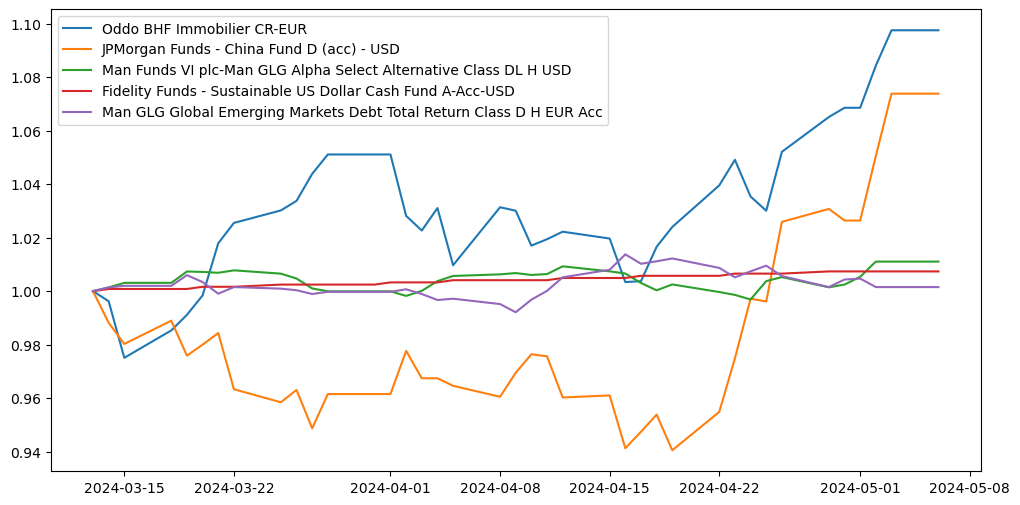

In [49]:
# target_return = 0.6

#ignore_funds = ['LU1133289758']
#selected_funds = [x for x in selected_funds if x not in ignore_funds]
#####  Get the funds for the target volatility
funds_to_buy, performance = new_funds_to_add(
    df_portofolio=new_portfolio,
    selected_funds=selected_funds, 
    n_funds_to_add=n_funds_to_add,
    last_n=last_n,
    #goal='efficient_return',
    #goal='min_volatility',
    goal='max_sharpe',
    #target=target_return,
    verbose=True,
    weight_bounds=(0,max_weight))

new_p = new_portfolio.index.append(pd.Index(funds_to_buy))

mu = mean_historical_return(df_quotes[new_p].loc[valid_date(current_date - timedelta(days=last_n_days)):current_date])
S = CovarianceShrinkage(df_quotes[new_p].loc[valid_date(current_date - timedelta(days=cov_n_days)):current_date]).ledoit_wolf()
ef = EfficientFrontier(mu, S, weight_bounds=(0,max_weight), solver='SCS')
#ef.efficient_return(target_return=target_return)
ef.max_sharpe(risk_free_rate=risk_free_rate)

df = portfolio_strategy(dfi=dfi,ef=ef)

df.sort_values('Code',ascending=False).to_csv('portfolio_changes_strategy.csv',index=False)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)
df_plot = df_quotes[pd.Index(funds_to_buy)][-40:]
ax = df_plot.apply(lambda x: x/df_plot.iloc[0],axis=1).rename(columns=df_perform['name']).sort_values(by=df_plot.index.max(), axis='columns', ascending=False).plot(figsize=(12,6))
ax.legend(loc='upper left')
ax.plot()
df.sort_values('change_amount')

### Get the revised Strategy, create wight bounds and initialize portofolio amounts

In [52]:
weight_strategy = pd.read_csv('portfolio_changes_strategy.csv',index_col=0)

transaction_limit = 3000.0
weight_bounds = list()
buy_list = list()
#df2 = df.set_index('Code')
for i, code in enumerate(df_quotes[new_p].columns):
    #print(i,code,weight_strategy.loc[code]['strategy'])
    if weight_strategy.loc[code]['strategy'] == 'c':
        kw = weight_strategy.loc[code]['amount'] / final_portfolio_amount # new weight for keeping the same amount
        #print(i, code, weight_strategy.loc[code]['change_amount'], weight_strategy.loc[code]['w_i'], weight_strategy.loc[code]['w_o'], kw)
        if abs(weight_strategy.loc[code]['change_amount']) < transaction_limit:
            weight_bounds.append((kw,kw)) # Keep
        elif weight_strategy.loc[code]['change_amount'] >= 0.0:
            weight_bounds.append((kw,max_weight)) # keep or buy
        else:
            weight_bounds.append((0.0,kw)) #keep or sell
    elif weight_strategy.loc[code]['strategy'] == 'k':
        kw = weight_strategy.loc[code]['amount'] / final_portfolio_amount # new weight for keeping the same amount
        weight_bounds.append((kw,kw))
    elif weight_strategy.loc[code]['strategy'] == 'f':
        kw = weight_strategy.loc[code]['final_amount'] / final_portfolio_amount # weight for a fixed amount
        weight_bounds.append((kw,kw))
    else:
        print("Unknown weight_strategy:",weight_strategy.loc[code])
    if weight_strategy.loc[code]['change_amount'] >= 0.0:
        buy_list.append((i,weight_strategy.loc[code]['w_i']))

#buy_list

### Optimize the Target Return for the revised Strategy

In [53]:
#target_return = 0.8
mu = mean_historical_return(df_quotes[new_p].loc[valid_date(current_date - timedelta(days=last_n_days)):current_date])
S = CovarianceShrinkage(df_quotes[new_p].loc[valid_date(current_date - timedelta(days=cov_n_days)):current_date]).ledoit_wolf()
ef = EfficientFrontier(mu, S, weight_bounds=weight_bounds, solver='SCS')
# Limit the amount to buy
buy_final_w = (sum([w_i for _,w_i in buy_list])*current_portfolio_amount + amount_to_buy) / final_portfolio_amount
ef.add_constraint(lambda x : sum([x[i] for i,_ in buy_list]) == buy_final_w)
#ef.efficient_return(target_return=target_return)
ef.max_sharpe(risk_free_rate=risk_free_rate)

df = portfolio_strategy(dfi=dfi,ef=ef,prev_strategy=weight_strategy)

df.sort_values('Code',ascending=False).to_csv('portfolio_changes_strategy.csv',index=False)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)
df.sort_values('change_amount')


Expected annual return: 70.1%
Annual volatility: 2.2%
Sharpe Ratio: 30.52


,Code,w_i,name,amount,w_o,strategy,final_amount,change_amount
5,LU0788144201,0.070814,Fidelity China RMB Bond,21854.135100,0.00089,c,274.665619,-21579.469481
6,IE00BLP5S353,0.067691,Jupiter Glb Abs Rt USD,20890.403054,0.02141,c,6607.405507,-14282.997547
10,LU1308313201,0.045883,Mirabaud - Discovery Europe ex UK,14160.227840,0.00000,c,0.000000,-14160.227840
12,LU1245572752,0.041909,T. Rowe Dynamic Global Bond,12933.649600,0.01207,c,3724.959574,-9208.690026
17,LU1735753946,0.021774,Morgan Stanley China A-shar,6719.890300,0.00000,c,0.000000,-6719.890300
18,IE00B432GG85,0.015791,BNY Mell Glb Dyn Bond A,4873.189500,0.00000,c,0.000000,-4873.189500
0,LU1799936197,0.085387,Pictet TR - Sirius,26351.496971,0.07186,c,22176.934131,-4174.562840
3,LU0252500524,0.074587,JPM EUR Money VNAV,23018.506600,0.07458,c,23016.361641,-2.144959
7,LU2207571022,0.061236,FF Absolute Return Global Hedged,18898.120800,0.06123,c,18896.377357,-1.743443
19,IE00BLP5S460,0.013804,JupiterMerian Absolute Return,4260.235980,0.01380,c,4258.860159,-1.375821


### Best Portofolio from all the funds

In [ ]:
'''### Inputs
# Funds to use
selected_funds = df_perform[df_perform['currency'].isin(['EUR','USD']) & (df_perform['rating']>3)]['ft category'].index.tolist()
df_selected_quotes = df_quotes[selected_funds].sort_index(axis=1)

mu = mean_historical_return(df_selected_quotes[-last_n:])
# mu_ds = ((df_perform['6 months']+df_perform['3 months'])/2)
# mu_ds = df_perform['2 week']
# mu = mu_ds[mu_ds.index.isin(selected_funds)].sort_index()
S = CovarianceShrinkage(df_selected_quotes[-cov_n:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS',weight_bounds=(0,0.1))
ef.max_sharpe(risk_free_rate=risk_free_rate)
#ef.efficient_return(target_return=0.25)
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
df = pd.DataFrame(cleaned_weights,columns=['symbol','w']).sort_values(by='w',ascending=False)

df_top = df_quotes[df[:20]['symbol']].sort_index(axis=1)

mu = mean_historical_return(df_top[-13:])
# mu_ds = ((df_perform['6 months']+df_perform['3 months'])/2)
# mu_ds = df_perform['2 week']
# mu = mu_ds[mu_ds.index.isin(selected_funds)].sort_index()
S = CovarianceShrinkage(df_top[-13:]).ledoit_wolf()
ef = EfficientFrontier(mu, S, solver='SCS',weight_bounds=(0,0.1))
ef.max_sharpe(risk_free_rate=risk_free_rate)
#ef.efficient_return(target_return=0.25)
cleaned_weights = ef.clean_weights()
cleaned_weights = [(s,w) for s,w in cleaned_weights.items() if w > 0.0]
df = pd.DataFrame(cleaned_weights,columns=['symbol','w']).sort_values(by='w',ascending=False)

df['name'] = df['symbol'].map(df_perform['name'])
best_from_all = df['symbol']
print(df)
ef.portfolio_performance(verbose=True,risk_free_rate=risk_free_rate)
'''

### Study Best Return

In [ ]:
'''
#min_return, max_return = 0.13, 0.30

result = list()
for tr in np.linspace(min_return, max_return, 13)[1:-2]:
    _, performance = new_funds_to_add(
        df_portofolio=new_portfolio,
        selected_funds=selected_funds, 
        n_funds_to_add=n_funds_to_add,
        last_n=last_n,
        goal='efficient_return',
        target=tr,
        verbose=False,
        weight_bounds=(0,max_weight))
    if performance is not None:
        result.append(performance)
        print(f"Return={performance[0]}; Volatility={performance[1]}; Sharpe={performance[2]}")
df_result = pd.DataFrame(result,columns=['return','volatility','sharpe']).set_index('volatility')

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first variable on the left y-axis
color = 'tab:green'
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Return', color=color)
ax1.plot(df_result.index, df_result['return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second variable on the right y-axis
color = 'tab:blue'
ax2.set_ylabel('sharpe', color=color)
ax2.plot(df_result.index, df_result['sharpe'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display the plot
plt.show()'''